# Denetimsiz Makine Öğrenmesi

## Kullanılan Modeller 
* Gaussian Mixture
* KMeans

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Veri setimiz pek denetimsiz makine öğrenmesine uygun değil fakat aygaz bootcampi kapsamında yaptığım bu projede aynı veri setini kullanmalıydım sizler bu yöntemleri farklı veri setlerinde kullanarak daha iyi sonuçlara ulaşabilirsiniz

In [2]:
# Veri setini CSV dosyasından okuyoruz ve ilk 3 satırı görüntülüyoruz
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv")
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [3]:
# SkinCancer değişkenini etiketleme (Label Encoding)
le = LabelEncoder()
df["SkinCancer"] = le.fit_transform(df["SkinCancer"])

In [4]:
# Birden fazla kategorik özelliğin one-hot encoding ile dönüştürülmesi
features = ["AgeCategory", "HeartDisease", "Smoking", "AlcoholDrinking", "Stroke",
            "DiffWalking", "Sex", "Race", "Diabetic", "PhysicalActivity", "GenHealth",
            "Asthma", "KidneyDisease"]
df = pd.get_dummies(df, columns=features, drop_first=True)  

In [5]:
# Eksik verilerin temizlenmesi (NA değerler atılır)
df.dropna(inplace=True)

In [6]:
# Veri setindeki kolon isimlerinin ve toplam veri sayısının yazdırılması
info = df.columns
print(info)
print(f'Toplam veri sayısı: {len(df)}')

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'SkinCancer',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes'],
      dtype='object')
Toplam veri sayısı: 319795


In [7]:
# Eksik verilerin kontrol edilmesi
missing_values = df.isnull().sum()
print(f'Eksik veriler: {missing_values}')

Eksik veriler: BMI                                 0
PhysicalHealth                      0
MentalHealth                        0
SleepTime                           0
SkinCancer                          0
AgeCategory_25-29                   0
AgeCategory_30-34                   0
AgeCategory_35-39                   0
AgeCategory_40-44                   0
AgeCategory_45-49                   0
AgeCategory_50-54                   0
AgeCategory_55-59                   0
AgeCategory_60-64                   0
AgeCategory_65-69                   0
AgeCategory_70-74                   0
AgeCategory_75-79                   0
AgeCategory_80 or older             0
HeartDisease_Yes                    0
Smoking_Yes                         0
AlcoholDrinking_Yes                 0
Stroke_Yes                          0
DiffWalking_Yes                     0
Sex_Male                            0
Race_Asian                          0
Race_Black                          0
Race_Hispanic                      

In [8]:
# Eksik veri varsa tekrar temizleme işlemi
if missing_values.sum() > 0:
    df.dropna(inplace=True)

In [9]:
# Hedef değişken (SkinCancer) ve özelliklerin ayrılması
y = df["SkinCancer"]
x = df.drop("SkinCancer", axis=1)  # Hedef değişkeni (SkinCancer) özelliklerden çıkar

In [10]:
# Verilerin ölçeklendirilmesi (standartlaştırma)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  

In [11]:
# KMeans kümeleme algoritmasının uygulanması
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [12]:
# KMeans Silhouette ve ARI skorlarının hesaplanması
silhouette_kmeans = silhouette_score(x_scaled, y_kmeans)
ari_kmeans = adjusted_rand_score(y, y_kmeans)
print(f'KMeans Silhouette Skoru: {silhouette_kmeans}')
print(f'KMeans ARI Skoru: {ari_kmeans}')

KMeans Silhouette Skoru: 0.18177920723109725
KMeans ARI Skoru: 0.045130372334698174


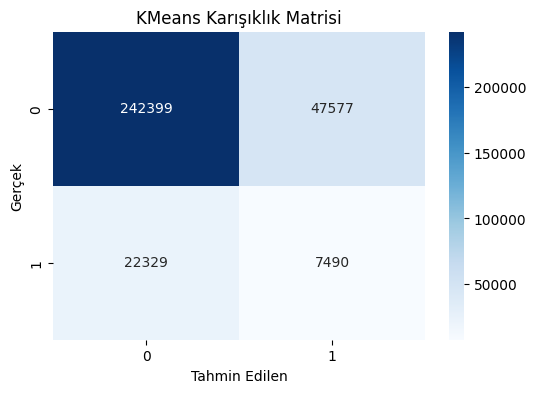

In [13]:
# KMeans için karışıklık matrisinin görselleştirilmesi
cm_kmeans = confusion_matrix(y, y_kmeans)
plt.figure(figsize=(6,4))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues')
plt.title('KMeans Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

In [14]:
# Gaussian Mixture Model (GMM) ile kümeleme yapılması
gmm = GaussianMixture(n_components=2, random_state=42)
y_gmm = gmm.fit_predict(x_scaled)

In [15]:
# Gaussian Mixture için Silhouette ve ARI skorlarının hesaplanması
silhouette_gmm = silhouette_score(x_scaled, y_gmm)
ari_gmm = adjusted_rand_score(y, y_gmm)
print(f'Gaussian Mixture Silhouette Skoru: {silhouette_gmm}')
print(f'Gaussian Mixture ARI Skoru: {ari_gmm}')

Gaussian Mixture Silhouette Skoru: 0.12614117064154126
Gaussian Mixture ARI Skoru: -0.06657941819007289


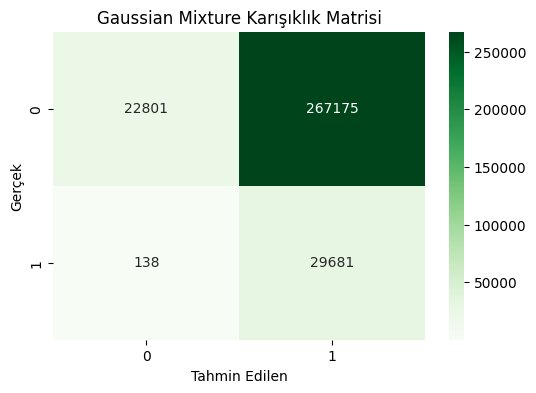

In [16]:
# Gaussian Mixture için karışıklık matrisinin görselleştirilmesi
cm_gmm = confusion_matrix(y, y_gmm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_gmm, annot=True, fmt='d', cmap='Greens')
plt.title('Gaussian Mixture Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()